# Gray-Scott model

Note in this model we will use vectorization method, instead of for-loop in the set-1 assignment.

In [2]:
import numpy as np
from numba import vectorize
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
'''
Firstly, generate the grid for Gray-Scott model.
Note this grid has size (n+1)*(n+1) to contain boundary values for x and y
'''

def initialize_grid(n):

    # grid containing boundary values
    u = np.ones((n+2, n+2)) / 2
    v = np.zeros((n+2, n+2))

    # find the indices for the area of v, say of length 0.2
    X, Y = np.meshgrid(np.linspace(0, 1, n+2), np.linspace(0, 1, n+2))

    # return a boolean matrix, corresponding to the position of object in the grid
    object_indi = (0.4 < X) & (0.6 > X) & (0.4 < Y) & (0.6 > Y)

    v[object_indi] = 0.25

    return u, v

In [4]:
'''
Define the boundary condition.
Note here we assum periodic boundary conditions for both x and y direction
'''

def bc(u):
    # periodic bc in x direction
    u[0, :] = u[-2, :]
    u[-1, :] = u[1, :]
    # periodic bc in y direction
    u[:, 0] = u[:, -2]
    u[:, -1] = u[:, 1]

In [5]:
'''
Define the function applying finite difference method
(in vectorize form)
'''

def fdm(u):
    return (u[2: , 1:-1] + u[ :-2, 1:-1] + u[1:-1, :-2] + u[1:-1, 2:] - 4*u[1:-1, 1:-1])


In [6]:
'''
main function
'''

def garry_scott_main(u_g, v_g, dx, dt, Du, Dv, f, k, noise=False, n_level=1e-2):
    

    # extract the u,v value for current time step
    u = u_g[1:-1, 1:-1]
    v = v_g[1:-1, 1:-1]

    # solve the Laplacian operator
    lu = fdm(u_g)
    lv = fdm(v_g)

    # add small amount of noise
    n_normal = 0
    if noise == True:
        n_normal= np.random.normal(0, n_level, size=(len(u[0]), len(u[0])))

    # solve the pde spatially for next time step
    u += (dt*Du/dx**2) * lu - dt*u*v*v + dt*f * (1 - u) + n_normal
    v += (dt*Dv/dx**2) * lv + dt*u*v*v - dt*(f + k) * v + n_normal
    # print(u_g)

    # update the boundary condition
    bc(u_g)
    bc(v_g)

    return u_g, v_g


In [75]:
'''
apply the process with different parameters
'''

# set the initial
dx, dt = 1.0, 1.0
Du, Dv = 0.16, 0.08
FK = [(0.035, 0.06), (0.04, 0.06), (0.012, 0.05), (0.025, 0.05)]

# initialize the grid
# U, V = initialize_grid(300)

U_store = np.zeros((4, 302, 302))

for i, (f, k) in enumerate(FK):
    U, V = initialize_grid(300)
    for t in range(3000):
        U, V = garry_scott_main(U, V, dx, dt, Du, Dv, f, k, noise=False, n_level=1e-3)
    
    U_store[i] = U



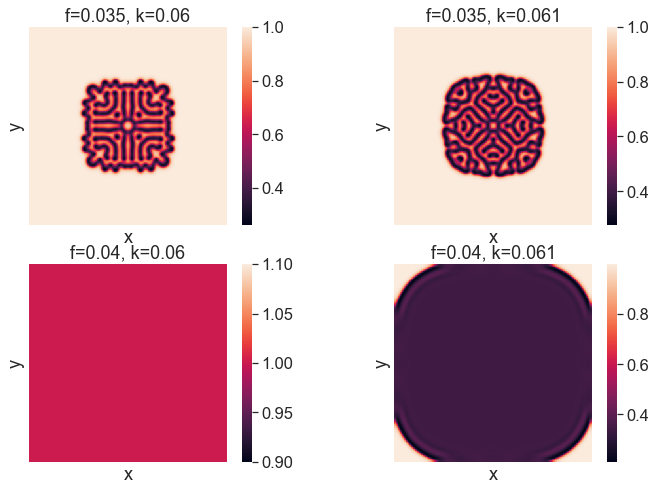

In [76]:
fig1, ax1 = plt.subplots(nrows=2, ncols=2)

plt.rcParams['figure.figsize'] = (12, 8)

sns.heatmap(U_store[0], cbar=True, xticklabels=False, yticklabels=False, square=True, ax=ax1[0][0])
ax1[0][0].set(xlabel='x', ylabel='y', title='f=0.035, k=0.06')
sns.heatmap(U_store[1], cbar=True, xticklabels=False, yticklabels=False, square=True, ax=ax1[0][1])
ax1[0][1].set(xlabel='x', ylabel='y', title='f=0.035, k=0.061')
sns.heatmap(U_store[2], cbar=True, xticklabels=False, yticklabels=False, square=True, ax=ax1[1][0])
ax1[1][0].set(xlabel='x', ylabel='y', title='f=0.04, k=0.06')
sns.heatmap(U_store[3], cbar=True, xticklabels=False, yticklabels=False, square=True, ax=ax1[1][1])
ax1[1][1].set(xlabel='x', ylabel='y', title='f=0.04, k=0.061')

sns.set(font_scale=1.5)

plt.show()


<AxesSubplot:>

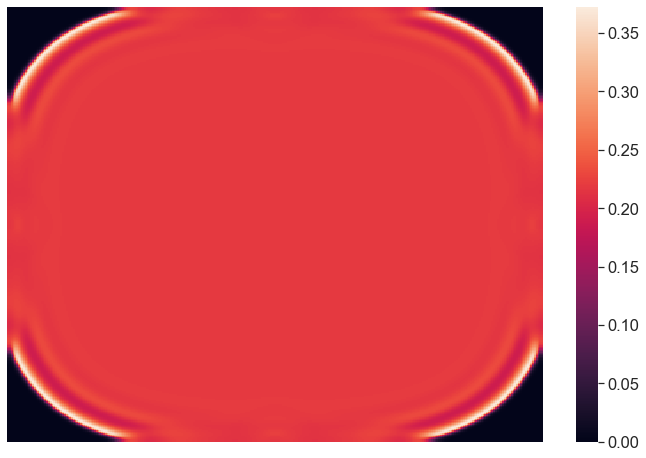

In [77]:
sns.heatmap(V, cbar=True, xticklabels=False, yticklabels=False)